## Final Project Submission

Please fill out:
* Student name: Benedict Wafula Kuloba
* Student pace: Full time - Full-Time Remote
* Scheduled project review date/time: 22/03/2024
* Instructor name: Asha Deen


# Business Understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

The primary objective of this project is to support Microsoft's entry into the film industry by offering crucial insights into the fundamental drivers behind a movie's success. Through an extensive analysis of diverse films, the aim is to identify distinct patterns that lay foundation for successful movies.



By leveraging information from these datasets, this analysis aimed to address key questions posed in the business problem, with a focus on target variables such as genres, runtime, domestic gross, and production budget.

Research Questions;

1. what are the most popular movie genres?
2. what is the average runtime minutes of a movie?
3. what is the average domestic gross for a standar movie?
4. what is the relationship between domestic gross profit and production budget?


# Data Understanding

Three different datasets are used for this Exploratory Data Analysis. These include;

bom_movies; which entails the domestic and foreign gross revenue figures different movies earned after production. This particular dataset will guide Microsoft to understand which movies and genres earn more and which ones to invest in.

Q_movies.info; which entails titles of movies and their genres. This file will especially guide Microsoft to understand in depth about the movie genres that are in the industry.

tmdbmovies_budget; which inludes production_budget of a movie gets once it is released and domestic_gross  and  worldwide_gross it commands. This dataset will show Microsoft which movies do well in the industry by observing those with the highest rating and votes.


# Data Cleaning

In this workbook we:
1.	Load the data into pandas DataFrames
2.	Inspect and observe the DataFrames
3.	Clean and convert the data into appropriate types


# Initial Reading & Cleaning of Data Files

In [35]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
import numpy as np
import os

In [36]:
os.chdir(r"C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\im.db")

In [37]:
#Open your db file

#Open 'im.db' database
conn = sqlite3.connect(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\im.db\im.db')

#Return list of every table in the db
table_names=pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""",conn)

#Return first 5 records of 'movie_basics' and 'movie_ratings' columns
movie_basics_columns = pd.read_sql("SELECT * FROM movie_basics;",conn)
movie_ratings_columns = pd.read_sql("SELECT * FROM movie_ratings;",conn)
movie_ratings_columns.head(),movie_basics_columns.head()

(     movie_id  averagerating  numvotes
 0  tt10356526            8.3        31
 1  tt10384606            8.9       559
 2   tt1042974            6.4        20
 3   tt1043726            4.2     50352
 4   tt1060240            6.5        21,
     movie_id                    primary_title              original_title  \
 0  tt0063540                        Sunghursh                   Sunghursh   
 1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
 2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
 3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
 4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   
 
    start_year  runtime_minutes                genres  
 0        2013            175.0    Action,Crime,Drama  
 1        2019            114.0       Biography,Drama  
 2        2018            122.0                 Drama  
 3        2018              NaN          Comedy,Drama  
 4       

In [38]:
#Open csv files

In [39]:
tnmovie_budgets_df1 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\tn.movie_budgets.csv\tn.movie_budgets.csv')
tnmovie_budgets_df1.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [40]:
bommovie_df2 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\bom.movie_gross.csv\bom.movie_gross.csv')
bommovie_df2.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [41]:
tmdbmovies_df3 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\tmdb.movies.csv\tmdb.movies.csv')
tmdbmovies_df3.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [42]:
rtreviews_df5 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\rt.reviews.tsv\rt.reviews.tsv', sep='\t', encoding='unicode_escape')
rtreviews_df5.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [43]:
rtmovie_df4 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\rt.movie_info.tsv\rt.movie_info.tsv', sep='\t')
rtmovie_df4.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [44]:
#Data Exploration

# Correlation

In [45]:
#Correlation between production_budget and domestic_gross

In [46]:
budgets_df = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\tn.movie_budgets.csv\tn.movie_budgets.csv')
budgets_df['production_budget'] = pd.to_numeric(budgets_df['production_budget'], errors='coerce')
budgets_df['domestic_gross'] = pd.to_numeric(budgets_df['domestic_gross'], errors='coerce')

budget_corr = budgets_df['production_budget'].corr(budgets_df['domestic_gross'])

print("Correlation between 'production_budget' and 'domestic_gross':", budget_corr)

Correlation between 'production_budget' and 'domestic_gross': nan


In [47]:
#The correlation is "Nan" because some cells have nan values and they have not been cleaned yet

In [48]:
#Measures Of Central Tendency

In [49]:
#Maximum average rating and genre
query_1 = "SELECT * FROM movie_basics"
query_2 = "SELECT * FROM movie_ratings"
basics_df = pd.read_sql_query(query_1, conn)
ratings_df = pd.read_sql_query(query_2, conn)
merge_df = pd.merge(basics_df,ratings_df, on='movie_id')

highest_rated_movie = merge_df.loc[merge_df['averagerating'].idxmax()]
highest_rated_movie_title = highest_rated_movie['primary_title']
highest_rated_movie_genre = highest_rated_movie['genres']
#Minimum average rating and genre
lowest_rated_movie = merge_df.loc[merge_df['averagerating'].idxmin()]
lowest_rated_movie_title = lowest_rated_movie['primary_title']
lowest_rated_movie_genre = lowest_rated_movie['genres']
#Print results
print('Movie with highest average rating:',highest_rated_movie_title,'.''Genre:',highest_rated_movie_genre)
print('Movie with lowest average rating:',lowest_rated_movie_title,'.''Genre:',lowest_rated_movie_genre)

Movie with highest average rating: Exteriores: Mulheres Brasileiras na Diplomacia .Genre: Documentary
Movie with lowest average rating: Hito no sabaku .Genre: Drama


In [50]:
#Mean Production Budget Per Year
# Convert 'production_budget' to string type before using .str accessor
tnmovie_budgets_df1['production_budget'] = tnmovie_budgets_df1['production_budget'].astype(str)

tnmovie_budgets_df1['release_date'] = pd.to_datetime(tnmovie_budgets_df1['release_date'])
tnmovie_budgets_df1['release_year'] = tnmovie_budgets_df1['release_date'].dt.year
tnmovie_budgets_df1['production_budget'] = tnmovie_budgets_df1['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
mean_budget = tnmovie_budgets_df1.groupby('release_year')['production_budget'].mean()
mean_budget

release_year
1915    1.100000e+05
1916    2.929535e+05
1920    1.000000e+05
1925    2.072500e+06
1927    2.000000e+06
            ...     
2016    4.097370e+07
2017    5.003073e+07
2018    4.813886e+07
2019    5.273896e+07
2020    9.400000e+07
Name: production_budget, Length: 96, dtype: float64

In [53]:
#Calculate no. of movies released per year
released_year_numbers = tnmovie_budgets_df1['release_year'].value_counts()
print(released_year_numbers)

2015    338
2010    274
2008    264
2006    260
2014    255
       ... 
1947      1
1927      1
1941      1
1937      1
1915      1
Name: release_year, Length: 96, dtype: int64


In [55]:
#Director with highest number of movies

query_3 = "SELECT * FROM directors"
query_4 = "SELECT * FROM persons"
directors_df = pd.read_sql_query(query_3, conn)
persons_df = pd.read_sql_query(query_4, conn)
merged_df2 = pd.merge(directors_df,persons_df, on='person_id')

director_counts = merged_df2['person_id'].value_counts()

most_frequent_id = director_counts.idxmax()
most_frequent_name = merged_df2.loc[merged_df2['person_id'] == most_frequent_id, 'primary_name'].iloc[0]

#Dirctor with lowest number of movies

least_frequent_id = director_counts.idxmin()
least_frequent_name = merged_df2.loc[merged_df2['person_id'] == least_frequent_id, 'primary_name'].iloc[0]

#Print

print("The person who has directed the most movies is:", most_frequent_name)
print("The person who has directed the least movies is:", least_frequent_name)

The person who has directed the most movies is: Omer Pasha
The person who has directed the least movies is: Danish Mumtaz


# Data Cleaning 

Process of dealing with numerical probelms and inconsistencies in your data.Some data cleaning tasks include:
1. Cleaning empty cells.
2. Cleaning wrong formats.
3. Cleaning wrong data.
4. Removing duplicates.

In [56]:
#Removing Duplicates

In [57]:
#Function For Removing Duplicates from csv files

def find_duplicates(dataframe):
    former_duplicates = dataframe.duplicated().sum() #Initial Duplicates
    if former_duplicates > 0:
        dataframe.drop_duplicates(inplace=True) #Removing Duplicates
        latter_duplicates = dataframe.duplicated().sum() #Updated Duplicates
        print("Duplicates removed. Number of duplicate rows before:", former_duplicates, ", Number of duplicate rows after:", latter_duplicates)
    else:
        print("No duplicates found.")

In [58]:
#Duplicates in movie_gross file
tnmovie_budgets_df1 = find_duplicates(tnmovie_budgets_df1)

No duplicates found.


In [59]:
#Duplicates In Movie_Budget File
bommovie_df2 = find_duplicates(bommovie_df2)

No duplicates found.


In [60]:
#Duplicates in movies file
tmdbmovies_df3 = find_duplicates(tmdbmovies_df3)

No duplicates found.


In [61]:
#Duplicates in movie_info file
rtmovie_df4 = find_duplicates(rtmovie_df4)

No duplicates found.


In [62]:
#Duplicates in reviews file
find_duplicates(rtreviews_df5)

Duplicates removed. Number of duplicate rows before: 9 , Number of duplicate rows after: 0


In [63]:
#There were 9 duplicates but I ran the code more than once

In [64]:
#Function for removing duplicates in database tables

def find_duplicates_db(conn,table_name):
    query = f"SELECT * FROM {table_name};"
    duplicate_df = pd.read_sql_query(query, conn)
    cleaned_df = duplicate_df.drop_duplicates()
    cleaned_df.to_sql(name=table_name, con=conn, if_exists='replace', index=False)
    print("Duplicates Removed")

In [65]:
#Duplicates in directors table)
find_duplicates_db(conn,'directors')

Duplicates Removed


In [66]:
#Duplicates in writers table)
find_duplicates_db(conn,'writers')

Duplicates Removed


In [67]:
#Duplicates in principals table)
find_duplicates_db(conn,'principals')

Duplicates Removed


In [68]:
#Duplicates in persons table)
find_duplicates_db(conn,'persons')

Duplicates Removed


In [69]:
#Duplicates in known_for table)
find_duplicates_db(conn,'known_for')

Duplicates Removed


In [70]:
#Duplicates in movie_ratings table)
find_duplicates_db(conn,'movie_ratings')

Duplicates Removed


In [71]:
#Duplicates in movie_akas table)
find_duplicates_db(conn,'movie_akas')

Duplicates Removed


In [72]:
#Duplicates in movie_basics table)
find_duplicates_db(conn,'movie_basics')
#Cleaning empty cells

Duplicates Removed


In [73]:
#Removing 'currency','studio'and 'box_office' columns in 'movie_info table because of Nan values'
df4 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\rt.movie_info.tsv\rt.movie_info.tsv', sep='\t')

columns_to_drop_movie_info = ['currency', 'studio','box_office']
new_df4 = df4.drop(columns=columns_to_drop_movie_info, inplace=False)
print(new_df4.head())

   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date      runtime  
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001  104 minutes  
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013  108 minutes  
2 

In [74]:
#Removing 'rating' and 'top_critic' columns from 'reviews' file because of Nan values
df5 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\rt.reviews.tsv\rt.reviews.tsv', sep='\t', encoding='unicode_escape')
columns_to_drop_reviews =['rating','top_critic']
new_df5 = df5.drop(columns=columns_to_drop_reviews, inplace=False)
print(new_df5.head())

   id                                             review   fresh  \
0   3  A distinctly gallows take on contemporary fina...   fresh   
1   3  It's an allegory in search of a meaning that n...  rotten   
2   3  ... life lived in a bubble in financial dealin...   fresh   
3   3  Continuing along a line introduced in last yea...   fresh   
4   3             ... a perverse twist on neorealism...    fresh   

           critic         publisher               date  
0      PJ Nabarro   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           io9.com       May 23, 2018  
2    Sean Axmaker  Stream on Demand    January 4, 2018  
3   Daniel Kasman              MUBI  November 16, 2017  
4             NaN      Cinema Scope   October 12, 2017  


In [75]:
#Replacing Nan values in movie_budgets file numerical columns with the mean of Non-Nan values

In [76]:
#Replace 'Nan' with empty values
df1 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\tn.movie_budgets.csv\tn.movie_budgets.csv')

df1.replace('NaN',np.nan,inplace=True)

#Make all characters numeric

df1['production_budget'] = df1['production_budget'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df1['domestic_gross'] = df1['domestic_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df1['worldwide_gross'] = df1['worldwide_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

#Find Mean

mean_production_budget = df1['production_budget'].mean()
mean_domestic_gross = df1['domestic_gross'].mean()
mean_worldwide_gross = df1['worldwide_gross'].mean()

#Replace empty values with mean

new_df1 = df1.fillna({'production_budget': mean_production_budget,
                     'domestic_gross': mean_domestic_gross,
                     'worldwide_gross': mean_worldwide_gross}, inplace=False)
#Print

print(new_df1.head())

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


In [77]:
#Replacing Nan values in movie_gross file numerical columns with the mean of Non-Nan values
df2 = pd.read_csv(r'C:\Users\bened\Documents\Moringa\Data-Science-_Movie_Content-Analysis\Data\bom.movie_gross.csv\bom.movie_gross.csv')

#Replace 'Nan' with empty values

df2.replace('NaN',np.nan,inplace=True)

#Make in characters in foreign_gross column numeric

df2['foreign_gross'] = df2['foreign_gross'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

#Find Mean

mean_domestic_gross_2 = df2['domestic_gross'].mean()
mean_foreign_gross = df2['foreign_gross'].mean()

#Replace the empty values with mean

new_df2 = df2.fillna({'domestic_gross': mean_domestic_gross_2,
                     'foreign_gross': mean_foreign_gross}, inplace=False)

print(new_df2.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year  
0    652000000.0  2010  
1    691300000.0  2010  
2    664300000.0  2010  
3    535700000.0  2010  
4    513900000.0  2010  


# Visualizations

These are graphical representations of data and information.They play a crucial role in understanding the patterns,trends and relatioships in data.Some of the common visualizations used un data analysis include:
1. Bar Plots.
2. Scatter Plots.
3. Histograms.
4. Line Plots.
5. Heat Maps.

# Heatmap showing correlation relationship between production budget and domestic gross.

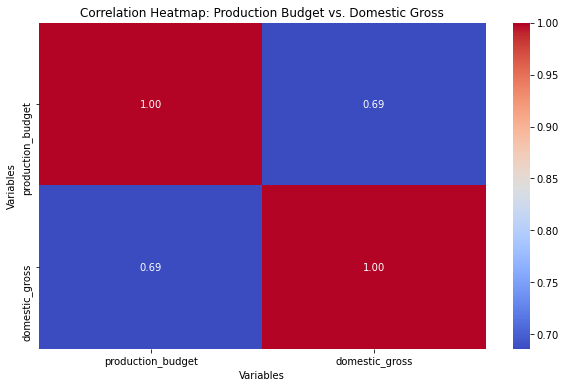

In [78]:
plt.figure(figsize=(10, 6))
sns.heatmap(new_df1[['production_budget', 'domestic_gross']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Production Budget vs. Domestic Gross')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

From the heat map above,we can conclude that there is a positive correlation relationship between production_budget and domestic_gross(0.69),which means when the production_budget increases,the domestic_gross also increases.

# Heatmap showing correlation relationship between domestic gross and worldwide gross.

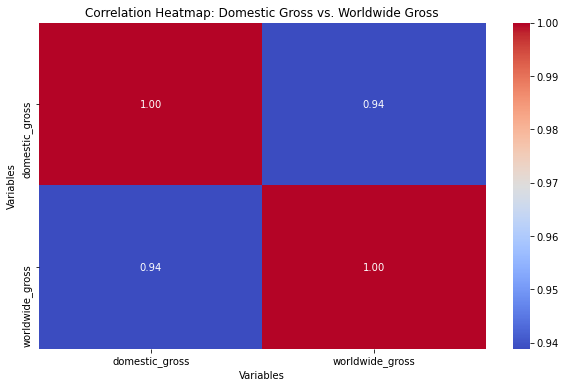

In [79]:
plt.figure(figsize=(10, 6))
sns.heatmap(new_df1[['domestic_gross', 'worldwide_gross']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Domestic Gross vs. Worldwide Gross')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

From the heat map above,we can conclude that there is a very strong positive correlation relationship between domestic_gross and worldwide_gross(0.94),which means when the production_budget increases,the domestic_gross will almost always also increase.

# Histogram showing frequency distribution of average movie ratings.

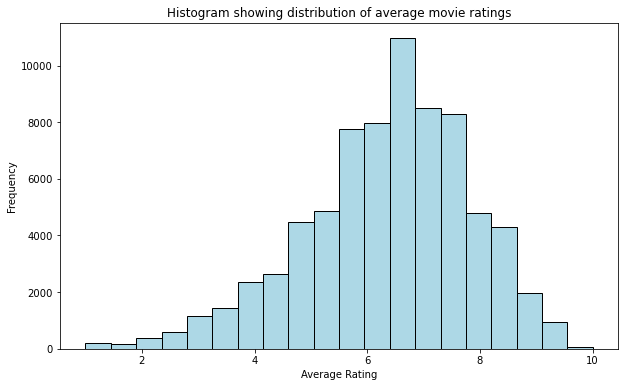

In [80]:
query_6 = "SELECT * FROM movie_ratings"

ratings_df = pd.read_sql_query(query_6, conn)

plt.figure(figsize=(10, 6)) 
plt.hist(ratings_df['averagerating'], bins=20, color='lightblue', edgecolor='black')  
plt.title('Histogram showing distribution of average movie ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()

From the histogram above,we can conclude that most movies are rated at 6.5.This also shows that 6.5 is the mean average rating

# Histogram showing frequency distribution of movie runtimes.

C:\Users\bened\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\bened\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


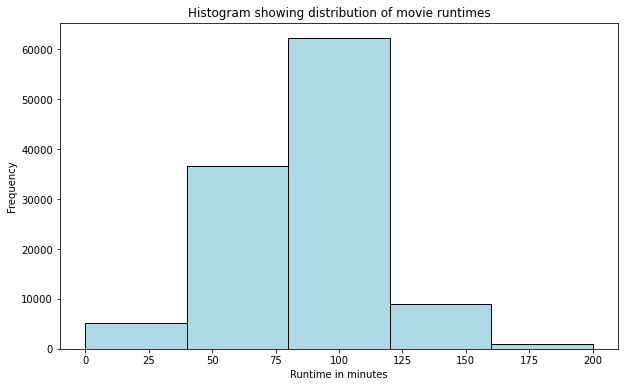

In [81]:
query_7 = "SELECT * FROM movie_basics"

ratings_df = pd.read_sql_query(query_7, conn)

plt.figure(figsize=(10, 6)) 
plt.hist(ratings_df['runtime_minutes'], bins=5,range=(0,200), color='lightblue', edgecolor='black')  
plt.title('Histogram showing distribution of movie runtimes')
plt.xlabel('Runtime in minutes')
plt.ylabel('Frequency')
plt.show()

From the histogram above,we can conclude that most movies are 100 minutes long./

# Bar Chart Showing The Top 5 And Bottom 5 Genres


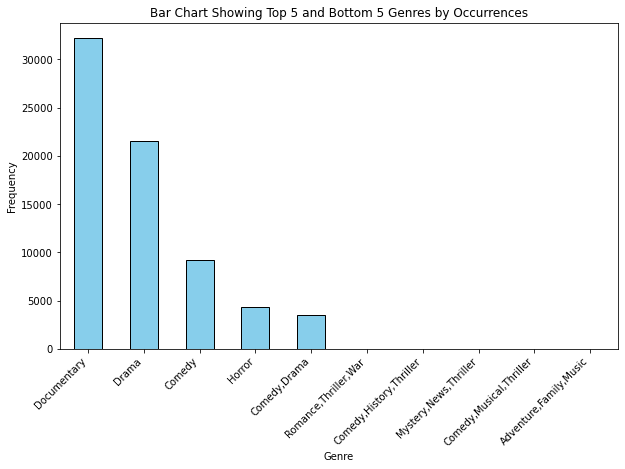

In [82]:
genres_df = pd.read_sql_query(query_7, conn)
# Count the occurrences of each genre
genre_counts = genres_df['genres'].value_counts()
# Select top 5 and bottom 5 genres
top_bottom_genres = pd.concat([genre_counts.head(5), genre_counts.tail(5)])
# Plot the bar chart
plt.figure(figsize=(10, 6)) 
top_bottom_genres.plot(kind='bar', color='skyblue', edgecolor='black') 
plt.title('Bar Chart Showing Top 5 and Bottom 5 Genres by Occurrences')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

From the bar chart depicting genre popularity, it can be concluded that the top five most popular genres are documentary, drama, comedy, horror, and comedy/drama, with documentary being the most popular among them. This finding aligns with the observation made during data exploration that the highest-rated movie is also a documentary.

Conversely, the least popular genres include documentary/musical/mystery, drama/horror/short, action/animation/music, crime/family/horror, and fantasy/history/sci-fi.

# Recommendations.

From the results of data exploration and the visualizations that I've created,I would make the following recommendations to Microsoft:
1. Invest heavily in the production budget: The analysis indicates a positive correlation between production budget and domestic gross, suggesting that allocating resources to production can lead to higher box office returns.

2. Focus on producing documentaries and dramas: These genres have been identified as the most popular among audiences, presenting an opportunity for Microsoft to capitalize on existing market trends.

3. Consider hiring 'Omar Pasha' as a writer and director: With a significant contribution to the number of films in the dataset, Omar Pasha demonstrates a strong track record in the industry, potentially bringing valuable expertise to Microsoft's film projects.

4. Aim for movie runtimes between 90 and 110 minutes: The average runtime falls within this range, indicating that movies of this duration are well-received by audiences.

5. Avoid producing musicals and fantasies: These genres have been identified as the least popular among audiences, suggesting that they may not yield significant returns on investment.

6. Target movie ratings of 6.5 or higher: With 6.5 being the average movie rating, Microsoft should aim to produce high-quality content that resonates positively with audiences.